In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import colorcet as cc
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import shapely.geometry as sgeom

In [2]:
cartopy.__version__

'0.20.2'

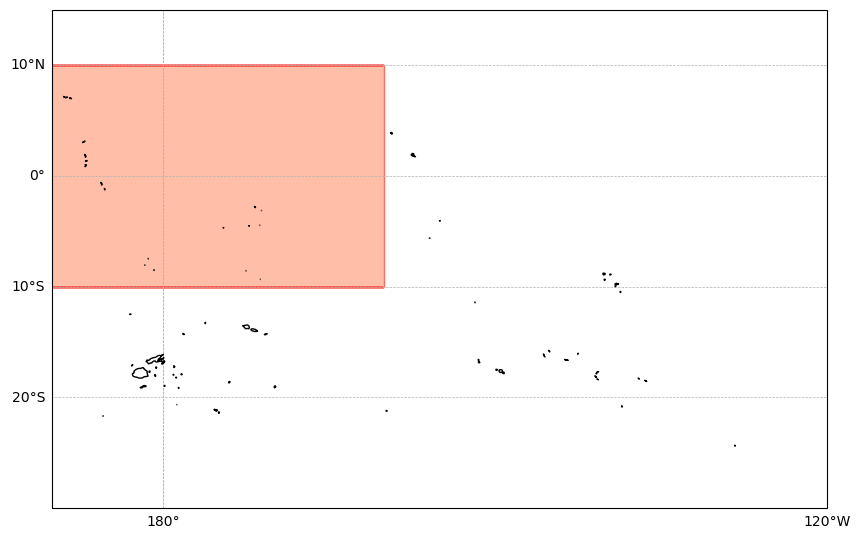

In [26]:
figsize = [10, 8]
# map_extent = [85, 210, -25, 15]
# map_extent = [85, 175, -25, 15]
# map_extent = [120, 240, -30, 15]
map_extent = [170, 240, -30, 15]
box_bounds = [160, 200, -10, 10]

lonv = None
latv = None
draw_border = None
box = sgeom.box(minx=box_bounds[0], maxx=box_bounds[1], miny=box_bounds[2], maxy=box_bounds[3])

# lonv = np.arange(-180, 360.1, 30)
# latv = np.arange(-90, 90.1, 10)
# lonv = np.arange(-180, 360.1, 30)
# latv = np.arange(-90, 90.1, 10)

# Set up map projection
proj = ccrs.PlateCarree(central_longitude=180)
data_proj = ccrs.PlateCarree(central_longitude=0)
resolution = '50m'
land = cfeature.NaturalEarthFeature('physical', 'land', resolution)

fig = plt.figure(figsize=figsize, dpi=100, facecolor='w')
ax1 = plt.subplot(1, 1, 1, projection=proj)
ax1.set_extent(map_extent, crs=data_proj)
ax1.add_feature(land, facecolor='none', edgecolor='k', zorder=3)

gl = ax1.gridlines(crs=data_proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.right_labels = False
gl.top_labels = False
if (lonv is not None) & (latv is not None):
    gl.xlocator = mpl.ticker.FixedLocator(lonv)
    gl.ylocator = mpl.ticker.FixedLocator(latv)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()        
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax1.add_geometries([box], crs=data_proj, facecolor='coral', edgecolor='r', alpha=0.5)

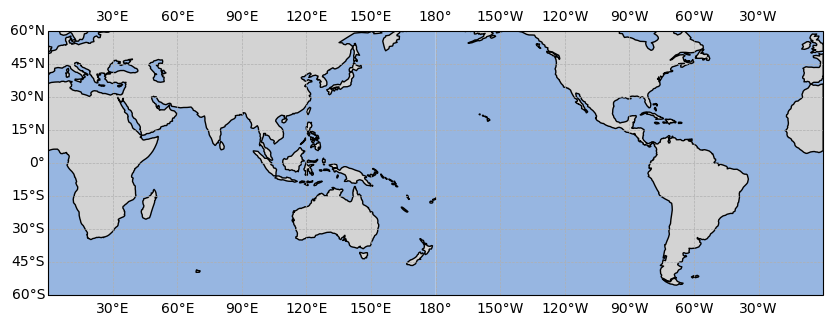

In [30]:
map_extent = [0.1, 359.9, -60.1, 60.1]
lonv = np.arange(-180,180.1,30)
latv = np.arange(-60,60.1,15)
proj = ccrs.PlateCarree(central_longitude=180)
data_proj = ccrs.PlateCarree(central_longitude=0)
resolution = '110m'
land = cfeature.NaturalEarthFeature('physical', 'land', resolution)
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', resolution)
borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', resolution)

fig = plt.figure(figsize=[10,3.5], dpi=100)
ax = plt.subplot(111, projection=proj)
ax.set_extent(map_extent, crs=proj)
ax.add_feature(land, facecolor='none', edgecolor='k', zorder=2)
ax.set_aspect('auto', adjustable=None)
ax.add_feature(land, facecolor='lightgray')
ax.add_feature(ocean, edgecolor='none', facecolor=cfeature.COLORS['water'])

gl = ax.gridlines(crs=data_proj, draw_labels=True, linestyle='--', linewidth=0.5)
gl.xlocator = mpl.ticker.FixedLocator(lonv)
gl.ylocator = mpl.ticker.FixedLocator(latv)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()        
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)